In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = web.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
Citi = web.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WellFC = web.DataReader("WFC", 'yahoo', start, end)

In [3]:
# Could also do this for a Panel Object
crashdf = web.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [4]:
# List of Keys as references to all Banks used in this analysis in alphabetical order
tickers = ['BAC', 'Citi', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
#Concatenating all data frames in one single called "bank_stocks
bank_stocks = pd.concat([BAC, Citi, GS, JPM, MS, WellFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

bank_stocks.head(5)

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.157749  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.763119  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.810474  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.755238  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.778908  15619400   

Bank Ticker        Citi                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.259113  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.286736  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.397205  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.438644  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.866695  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.238424  11016400  
2006-01-04   31.365000  31.530001  22.968884  10870000  
2006-01-05   31.309999  31.495001  22.943392  10158000  
2006-01-06   31.385000  31.680000  23.078157   8403800  
2006-01-09   31.555000  31.674999  23.074520   5619600  

[5 rows x 36 columns]

In [6]:
#Setting a dataframe with only stock prices at close
closedf = pd.DataFrame()
for tick in tickers:
    closedf[tick+' Close Stock Value'] = bank_stocks[tick]['Close']
closedf.head(10)

,BAC Close Stock Value,Citi Close Stock Value,GS Close Stock Value,JPM Close Stock Value,MS Close Stock Value,WFC Close Stock Value
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
2006-01-10,46.209999,485.399994,132.029999,40.730000,59.220001,31.650000
2006-01-11,46.099998,489.799988,131.970001,40.700001,59.570000,31.815001
2006-01-12,45.799999,490.299988,132.250000,39.950001,59.470001,31.445000
2006-01-13,45.799999,489.200012,133.259995,39.919998,59.380001,31.625000


In [7]:
closedf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
BAC Close Stock Value     2517 non-null float64
Citi Close Stock Value    2517 non-null float64
GS Close Stock Value      2517 non-null float64
JPM Close Stock Value     2517 non-null float64
MS Close Stock Value      2517 non-null float64
WFC Close Stock Value     2517 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


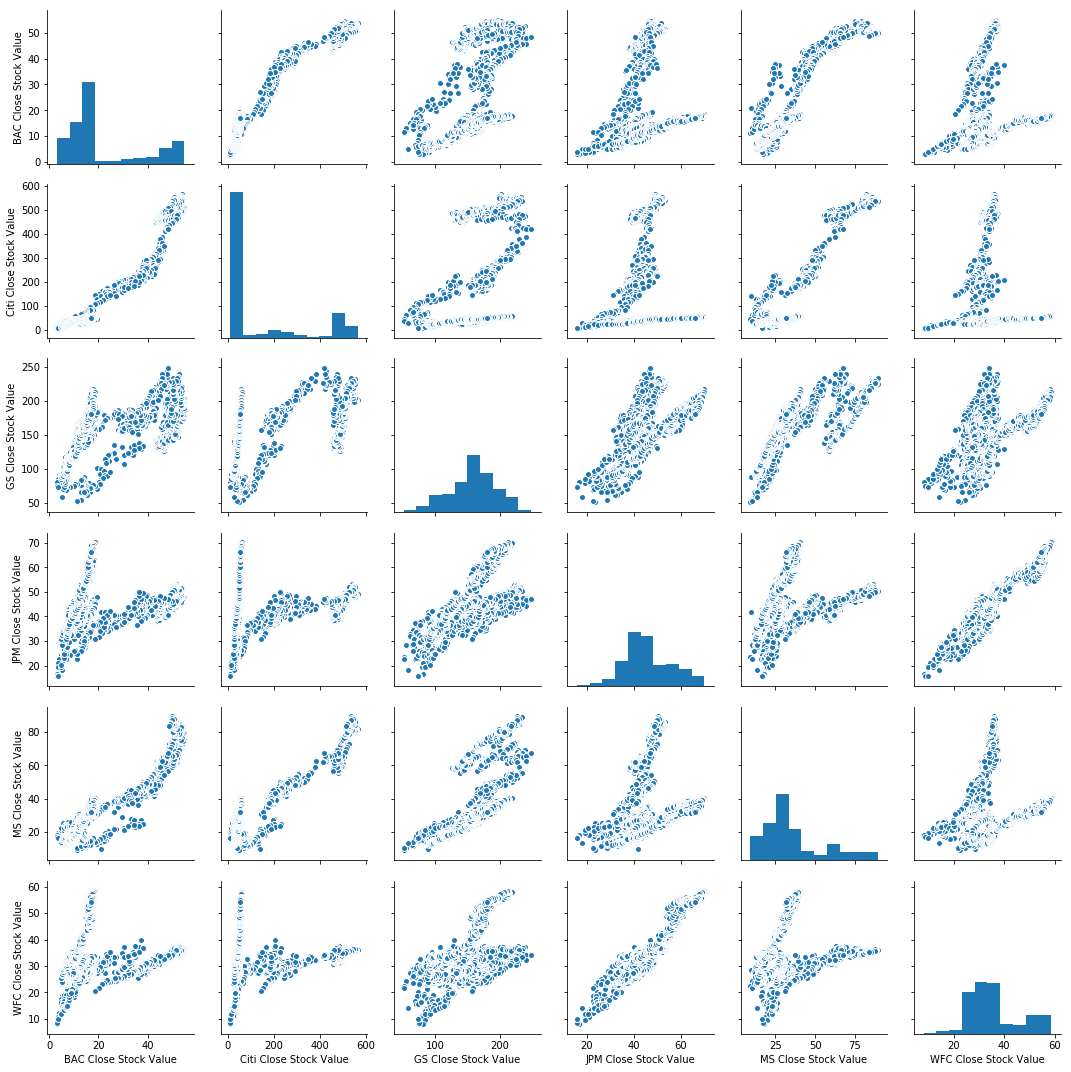

In [8]:
import seaborn as sns
sns.pairplot(closedf)

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

In [9]:
#The max Close price for each bank's stock throughout 2006-2016
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()


Bank Ticker
BAC      54.900002
Citi    564.099976
GS      247.919998
JPM      70.080002
MS       89.300003
WFC      58.520000
dtype: float64

** Now, we´re going to create a new empty DataFrame called 'returnsdf'. This dataframe will contain the returns for each bank's stock.** 

**Returns are typically defined as:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

&nbsp;
&nbsp;
<p style="text-align: center;">**Not counting Dividends and Stock Splits**</p>

In [10]:
returnsdf = pd.DataFrame()

** And then, we can use pandas pct_change() metho on the Close column to create a column representing this return value in a loop to set this for all banks.**

In [11]:
for tick in tickers:
    returnsdf[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returnsdf.head(10)

,BAC Return,Citi Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002243,0.007637,-0.000751,-0.001513,0.005724


**Note it that as expected, the 1st row received a null value. So to plot this, we need to keep in mind to skip the 1st row**

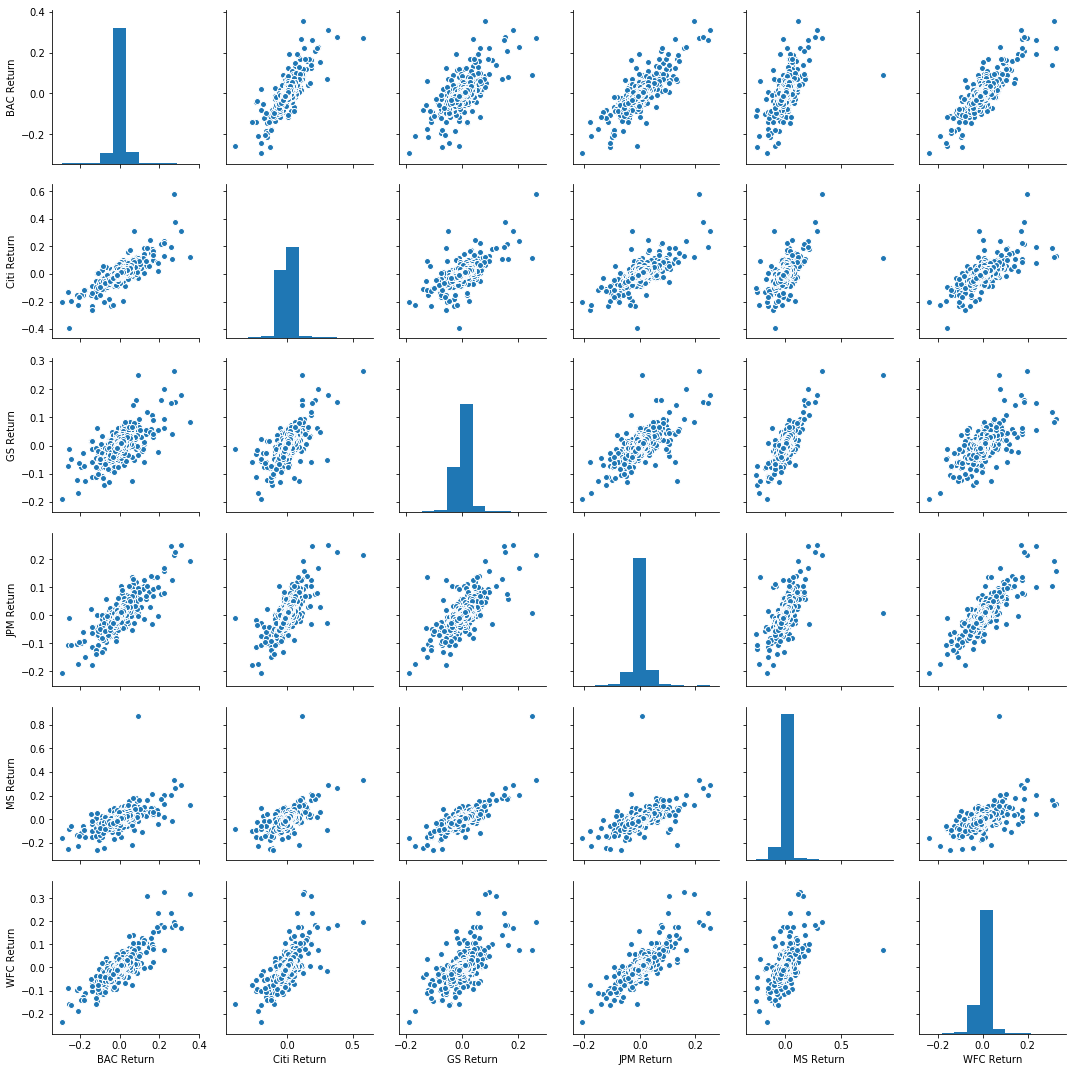

In [12]:
#returns[1:]
sns.pairplot(returnsdf[1:])

In [13]:
# Worst Drop (4 of them on Inauguration day)
returnsdf.idxmin()

BAC Return    2009-01-20
Citi Return   2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

&nbsp;
[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [14]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returnsdf.idxmax()

BAC Return    2009-04-09
Citi Return   2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returnsdf.std() # Citigroup riskiest

BAC Return     0.036647
Citi Return    0.038672
GS Return      0.025390
JPM Return     0.027667
MS Return      0.037819
WFC Return     0.030238
dtype: float64

In [16]:
returnsdf.loc['2015-01-01':'2015-12-31'].std()# Very similar risk profiles, but Morgan Stanley or BofA

BAC Return     0.016163
Citi Return    0.015289
GS Return      0.014046
JPM Return     0.014017
MS Return      0.016249
WFC Return     0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

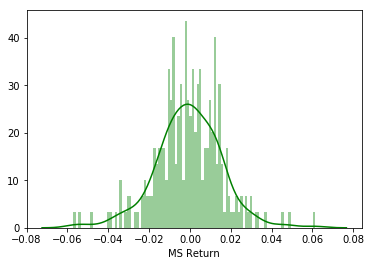

In [17]:
sns.distplot(returnsdf.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

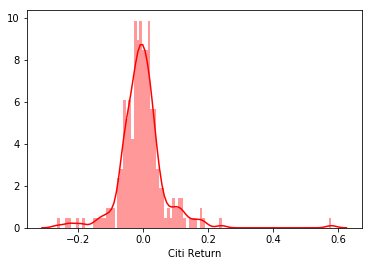

In [19]:
sns.distplot(returnsdf.loc['2008-01-01':'2008-12-31']['Citi Return'],color='red',bins=100)

# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf

** Creating a line plot showing close price for each bank for the entire index of time

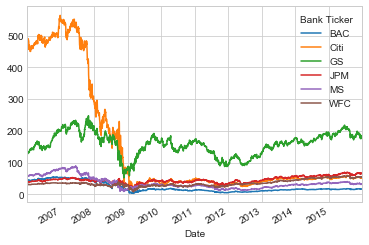

In [34]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** We will show the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

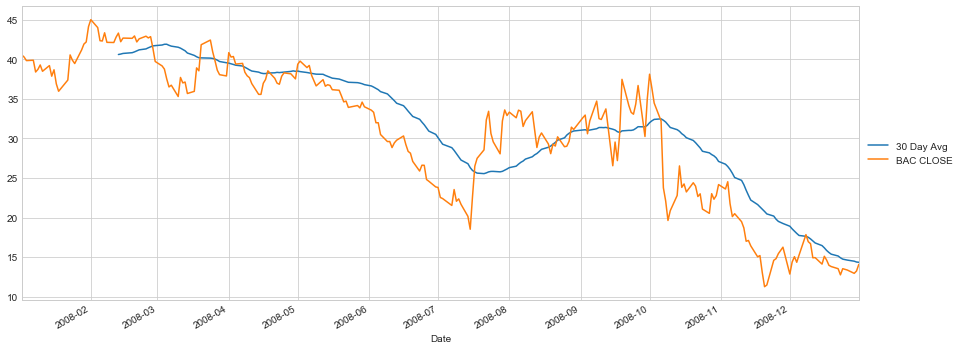

In [23]:
plt.figure(figsize=(15,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

** Creating a heatmap of the correlation between the stocks Close Price.**

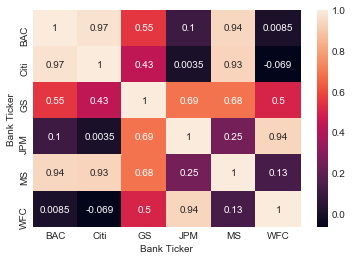

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Using seaborn's clustermap to cluster the correlations together:**

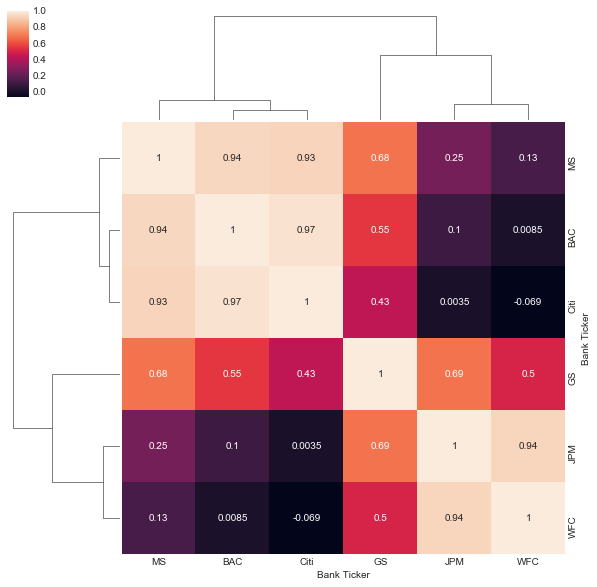

In [25]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2

In this second part we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so it may be broken in the future.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [26]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [27]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [28]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')